In [1]:
k = 803

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D


# Load data

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space = 100 #6
batchs = [10,100,1000]
BATCH_SIZE = 256 #100
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 1000 #100000
bias = [True,False]
use_bias = True

[2. 0. 0. 0. 0. 0.]


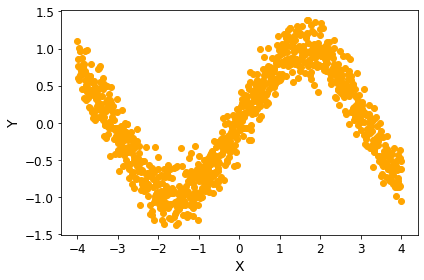

In [4]:
X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

plt.scatter(X_train,y_train, c='orange', label='Sample Data')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# WGAN

### Architecture

In [6]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                3030      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [7]:
wgan = WGAN_Model_2D.WGAN(k,n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 3672      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 6,233
Trainable params: 6,133
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (256, 2)
data shape_2 (256, 2)
data shape_3 (256, 2)
data shape_4 (232, 2)
Cycles:  4
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (256, 2)
train_dataset (256, 2)
train_dataset (256, 2)
train_dataset (232, 2)


## Training

Epoch 1/10000
critic: 28.657719 - generator: 0.090099 - 3s
Epoch 2/10000
critic: 8.833010 - generator: 0.043341 - 0s
Epoch 3/10000
critic: 2.457674 - generator: 0.018024 - 0s
Epoch 4/10000
critic: 0.964943 - generator: 0.004437 - 0s
Epoch 5/10000
critic: 0.646591 - generator: -0.003143 - 0s
Epoch 6/10000
critic: 0.431586 - generator: -0.004693 - 0s
Epoch 7/10000
critic: 0.264325 - generator: -0.004415 - 0s
Epoch 8/10000
critic: 0.203778 - generator: -0.004644 - 0s
Epoch 9/10000
critic: 0.044719 - generator: -0.003707 - 0s
Epoch 10/10000
critic: 0.020097 - generator: -0.001365 - 0s
Epoch 11/10000
critic: 0.015223 - generator: 0.000951 - 0s
Epoch 12/10000
critic: 0.027497 - generator: 0.000806 - 0s
Epoch 13/10000
critic: 0.009325 - generator: 0.001834 - 0s
Epoch 14/10000
critic: 0.008528 - generator: 0.000582 - 0s
Epoch 15/10000
critic: 0.022695 - generator: 0.001412 - 0s
Epoch 16/10000
critic: 0.018512 - generator: -0.000692 - 0s
Epoch 17/10000
critic: 0.006721 - generator: 0.001033 - 0

critic: -0.001386 - generator: -0.035948 - 0s
Epoch 137/10000
critic: -0.001859 - generator: -0.035879 - 0s
Epoch 138/10000
critic: -0.000345 - generator: -0.035820 - 0s
Epoch 139/10000
critic: -0.006199 - generator: -0.035864 - 0s
Epoch 140/10000
critic: -0.004745 - generator: -0.035560 - 0s
Epoch 141/10000
critic: -0.004199 - generator: -0.036445 - 0s
Epoch 142/10000
critic: -0.002059 - generator: -0.037034 - 0s
Epoch 143/10000
critic: -0.003000 - generator: -0.037180 - 0s
Epoch 144/10000
critic: -0.004491 - generator: -0.037077 - 0s
Epoch 145/10000
critic: -0.002999 - generator: -0.037499 - 0s
Epoch 146/10000
critic: -0.001749 - generator: -0.036352 - 0s
Epoch 147/10000
critic: -0.003832 - generator: -0.036320 - 0s
Epoch 148/10000
critic: -0.004012 - generator: -0.035621 - 0s
Epoch 149/10000
critic: -0.002929 - generator: -0.036126 - 0s
Epoch 150/10000
critic: 0.000296 - generator: -0.036401 - 0s
Epoch 151/10000
critic: -0.005542 - generator: -0.037154 - 0s
Epoch 152/10000
critic: -

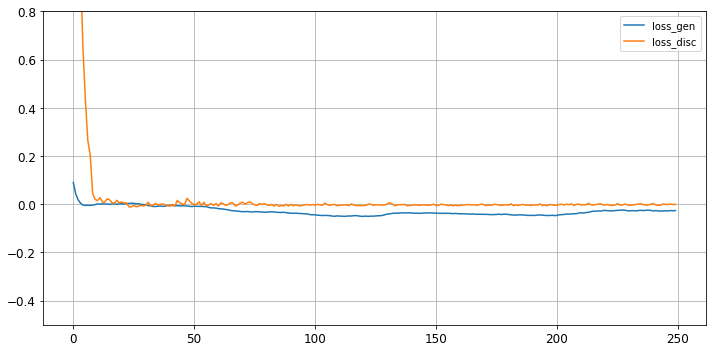

Predicted Values: (1000, 2)
save latent space


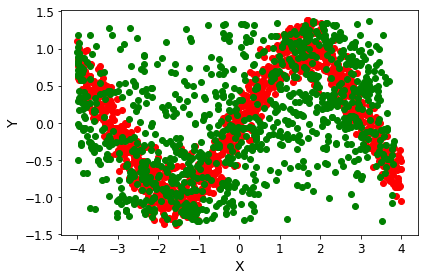

save countour line


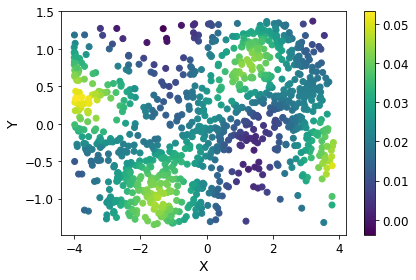

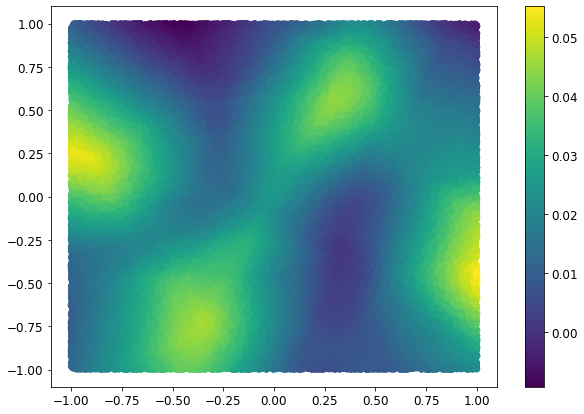

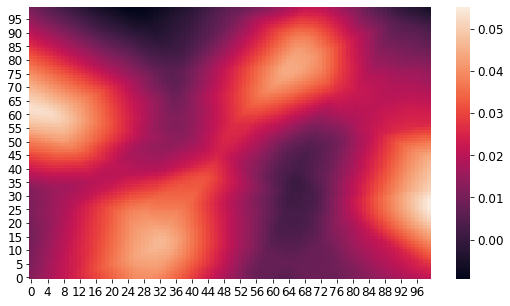

Epoch 251/10000
critic: -0.002619 - generator: -0.026934 - 0s
Epoch 252/10000
critic: -0.002809 - generator: -0.027784 - 0s
Epoch 253/10000
critic: -0.002476 - generator: -0.027235 - 0s
Epoch 254/10000
critic: 0.000301 - generator: -0.024845 - 0s
Epoch 255/10000
critic: 0.000052 - generator: -0.024603 - 0s
Epoch 256/10000
critic: -0.001467 - generator: -0.025042 - 0s
Epoch 257/10000
critic: 0.005658 - generator: -0.023731 - 0s
Epoch 258/10000
critic: -0.002557 - generator: -0.024423 - 0s
Epoch 259/10000
critic: 0.001554 - generator: -0.023463 - 0s
Epoch 260/10000
critic: 0.001341 - generator: -0.022546 - 0s
Epoch 261/10000
critic: 0.000600 - generator: -0.022280 - 0s
Epoch 262/10000
critic: 0.002552 - generator: -0.024047 - 0s
Epoch 263/10000
critic: -0.000649 - generator: -0.022400 - 0s
Epoch 264/10000
critic: -0.000601 - generator: -0.022045 - 0s
Epoch 265/10000
critic: 0.000481 - generator: -0.022979 - 0s
Epoch 266/10000
critic: -0.000185 - generator: -0.020095 - 0s
Epoch 267/10000


critic: -0.000075 - generator: -0.005317 - 0s
Epoch 388/10000
critic: 0.001102 - generator: -0.004467 - 0s
Epoch 389/10000
critic: -0.000542 - generator: -0.004199 - 0s
Epoch 390/10000
critic: 0.000176 - generator: -0.003476 - 0s
Epoch 391/10000
critic: -0.000072 - generator: -0.002580 - 0s
Epoch 392/10000
critic: 0.001935 - generator: -0.001957 - 0s
Epoch 393/10000
critic: 0.003905 - generator: -0.001595 - 0s
Epoch 394/10000
critic: -0.000333 - generator: -0.001749 - 0s
Epoch 395/10000
critic: 0.002949 - generator: -0.001862 - 0s
Epoch 396/10000
critic: 0.000410 - generator: -0.000631 - 0s
Epoch 397/10000
critic: 0.000724 - generator: 0.000209 - 0s
Epoch 398/10000
critic: 0.000722 - generator: -0.000576 - 0s
Epoch 399/10000
critic: 0.001762 - generator: -0.000581 - 0s
Epoch 400/10000
critic: 0.003920 - generator: 0.001189 - 0s
Epoch 401/10000
critic: 0.002732 - generator: 0.001697 - 0s
Epoch 402/10000
critic: 0.003506 - generator: 0.001645 - 0s
Epoch 403/10000
critic: 0.004007 - gener

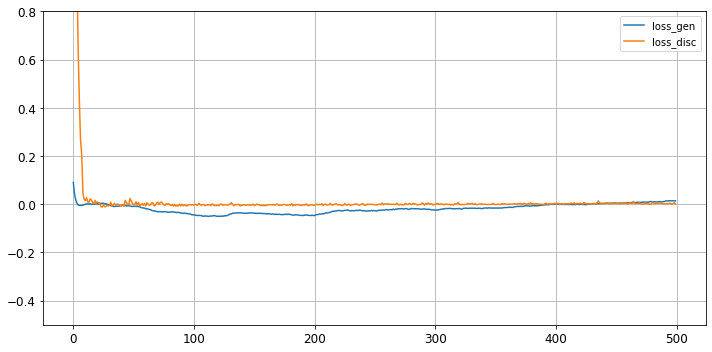

Predicted Values: (1000, 2)
save latent space


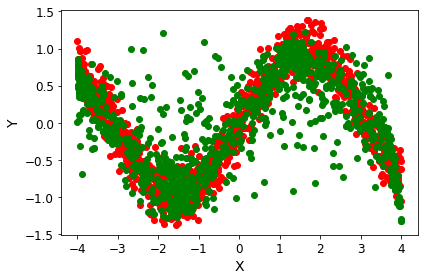

save countour line


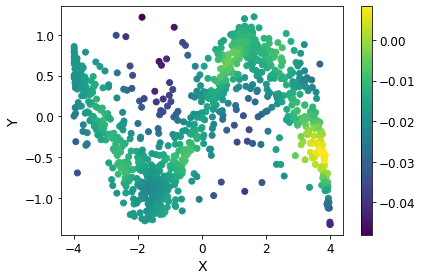

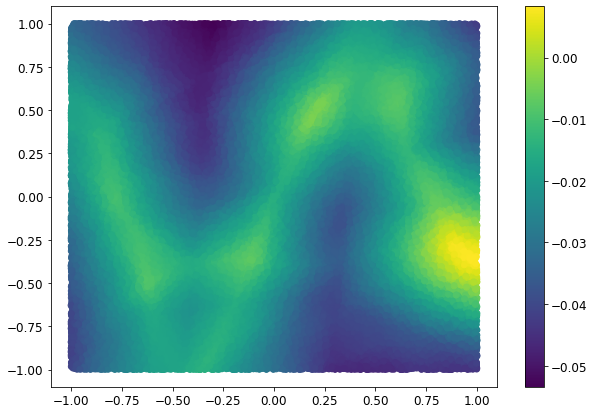

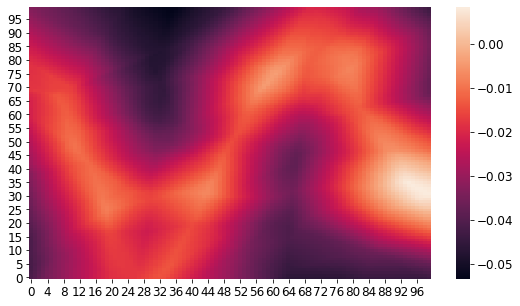

Epoch 501/10000
critic: 0.001621 - generator: 0.013067 - 0s
Epoch 502/10000
critic: 0.002180 - generator: 0.014703 - 0s
Epoch 503/10000
critic: 0.001471 - generator: 0.014282 - 0s
Epoch 504/10000
critic: 0.001576 - generator: 0.014295 - 0s
Epoch 505/10000
critic: 0.001636 - generator: 0.015066 - 0s
Epoch 506/10000
critic: 0.006223 - generator: 0.014353 - 0s
Epoch 507/10000
critic: 0.005207 - generator: 0.015357 - 0s
Epoch 508/10000
critic: 0.007006 - generator: 0.015075 - 0s
Epoch 509/10000
critic: 0.005046 - generator: 0.014692 - 0s
Epoch 510/10000
critic: 0.005500 - generator: 0.014247 - 0s
Epoch 511/10000
critic: 0.004882 - generator: 0.013564 - 0s
Epoch 512/10000
critic: 0.003831 - generator: 0.013581 - 0s
Epoch 513/10000
critic: 0.006375 - generator: 0.013318 - 0s
Epoch 514/10000
critic: 0.010850 - generator: 0.013543 - 0s
Epoch 515/10000
critic: 0.005133 - generator: 0.014320 - 0s
Epoch 516/10000
critic: 0.002802 - generator: 0.014593 - 0s
Epoch 517/10000
critic: 0.002460 - gener

critic: 0.003480 - generator: 0.028063 - 0s
Epoch 641/10000
critic: 0.008225 - generator: 0.028663 - 0s
Epoch 642/10000
critic: 0.004271 - generator: 0.029438 - 0s
Epoch 643/10000
critic: 0.002904 - generator: 0.029137 - 0s
Epoch 644/10000
critic: 0.003508 - generator: 0.028592 - 0s
Epoch 645/10000
critic: 0.002353 - generator: 0.027831 - 0s
Epoch 646/10000
critic: 0.004590 - generator: 0.027535 - 0s
Epoch 647/10000
critic: 0.002112 - generator: 0.026118 - 0s
Epoch 648/10000
critic: 0.002637 - generator: 0.026720 - 0s
Epoch 649/10000
critic: 0.004424 - generator: 0.028278 - 0s
Epoch 650/10000
critic: 0.002660 - generator: 0.028825 - 0s
Epoch 651/10000
critic: 0.005432 - generator: 0.027527 - 0s
Epoch 652/10000
critic: 0.001123 - generator: 0.027892 - 0s
Epoch 653/10000
critic: 0.003457 - generator: 0.027936 - 0s
Epoch 654/10000
critic: 0.002965 - generator: 0.027638 - 0s
Epoch 655/10000
critic: 0.004055 - generator: 0.026295 - 0s
Epoch 656/10000
critic: 0.004592 - generator: 0.025727 -

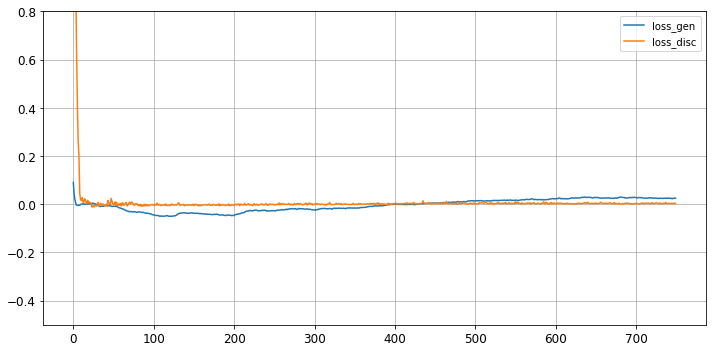

Predicted Values: (1000, 2)
save latent space


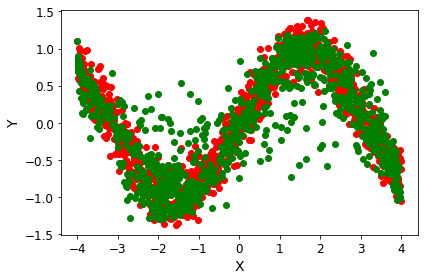

save countour line


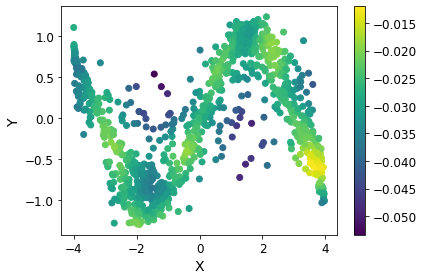

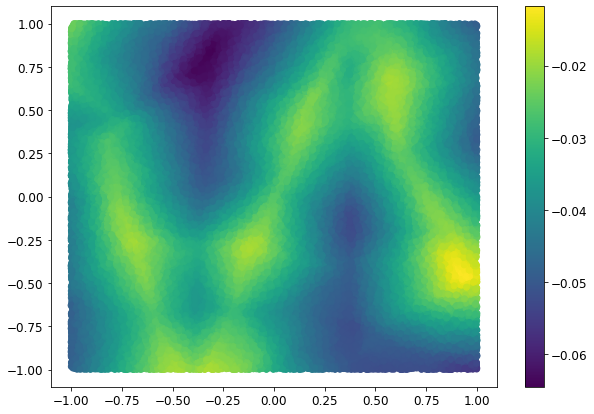

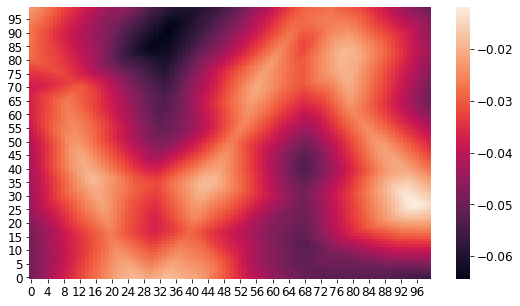

Epoch 751/10000
critic: 0.004497 - generator: 0.025036 - 0s
Epoch 752/10000
critic: 0.002810 - generator: 0.023888 - 0s
Epoch 753/10000
critic: 0.002593 - generator: 0.022507 - 0s
Epoch 754/10000
critic: 0.003309 - generator: 0.022701 - 0s
Epoch 755/10000
critic: 0.003480 - generator: 0.021741 - 0s
Epoch 756/10000
critic: 0.002648 - generator: 0.021833 - 0s
Epoch 757/10000
critic: 0.004782 - generator: 0.023726 - 0s
Epoch 758/10000
critic: 0.002044 - generator: 0.024208 - 0s
Epoch 759/10000
critic: 0.004483 - generator: 0.024920 - 0s
Epoch 760/10000
critic: 0.005969 - generator: 0.025915 - 0s
Epoch 761/10000
critic: 0.004276 - generator: 0.024443 - 0s
Epoch 762/10000
critic: 0.001520 - generator: 0.025117 - 0s
Epoch 763/10000
critic: 0.002437 - generator: 0.025141 - 0s
Epoch 764/10000
critic: 0.002440 - generator: 0.024291 - 0s
Epoch 765/10000
critic: 0.001277 - generator: 0.026476 - 0s
Epoch 766/10000
critic: 0.003694 - generator: 0.024368 - 0s
Epoch 767/10000
critic: 0.004163 - gener

critic: 0.004398 - generator: 0.026927 - 0s
Epoch 890/10000
critic: 0.003494 - generator: 0.029034 - 0s
Epoch 891/10000
critic: 0.003500 - generator: 0.028223 - 0s
Epoch 892/10000
critic: 0.002579 - generator: 0.029088 - 0s
Epoch 893/10000
critic: 0.003062 - generator: 0.028864 - 0s
Epoch 894/10000
critic: 0.003969 - generator: 0.029386 - 0s
Epoch 895/10000
critic: 0.003849 - generator: 0.029065 - 0s
Epoch 896/10000
critic: 0.005159 - generator: 0.030435 - 0s
Epoch 897/10000
critic: 0.002883 - generator: 0.030348 - 0s
Epoch 898/10000
critic: 0.005826 - generator: 0.029777 - 0s
Epoch 899/10000
critic: 0.005126 - generator: 0.030131 - 0s
Epoch 900/10000
critic: 0.003518 - generator: 0.031264 - 0s
Epoch 901/10000
critic: 0.007336 - generator: 0.028964 - 0s
Epoch 902/10000
critic: 0.002584 - generator: 0.029400 - 0s
Epoch 903/10000
critic: 0.001408 - generator: 0.029329 - 0s
Epoch 904/10000
critic: 0.004891 - generator: 0.030886 - 0s
Epoch 905/10000
critic: 0.002928 - generator: 0.030634 -

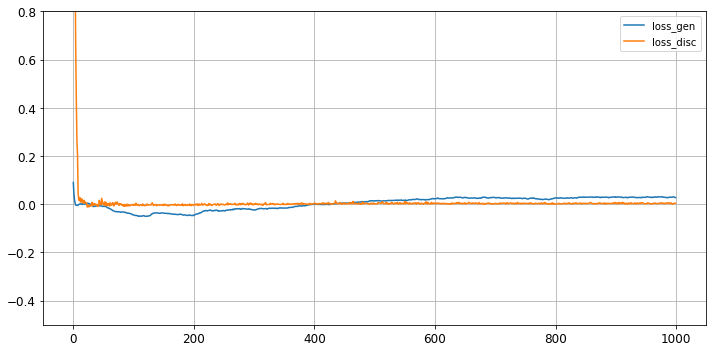

Predicted Values: (1000, 2)
save latent space


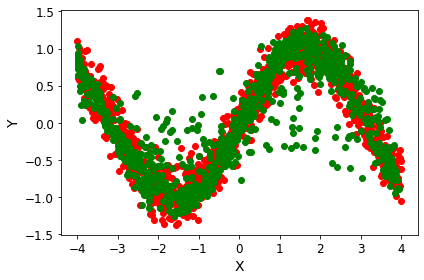

save countour line


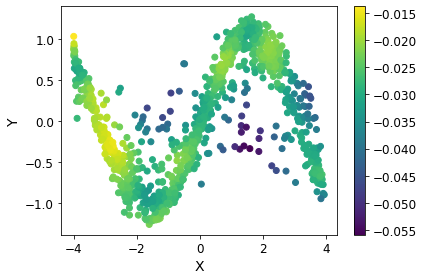

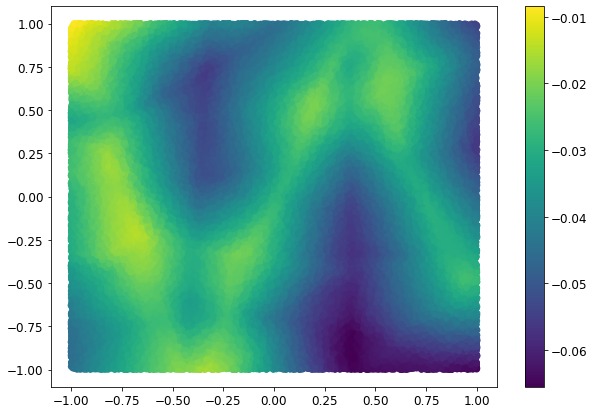

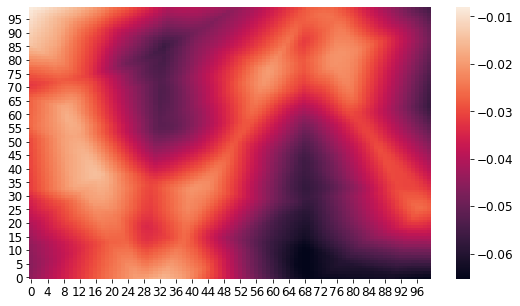

Epoch 1001/10000
critic: 0.004932 - generator: 0.026988 - 0s
Epoch 1002/10000
critic: 0.003101 - generator: 0.027602 - 0s
Epoch 1003/10000
critic: 0.002317 - generator: 0.028216 - 0s
Epoch 1004/10000
critic: 0.005967 - generator: 0.028170 - 0s
Epoch 1005/10000
critic: 0.004347 - generator: 0.030291 - 0s
Epoch 1006/10000
critic: 0.004816 - generator: 0.029371 - 0s
Epoch 1007/10000
critic: 0.003943 - generator: 0.031238 - 0s
Epoch 1008/10000
critic: 0.002464 - generator: 0.031650 - 0s
Epoch 1009/10000
critic: 0.004640 - generator: 0.031343 - 0s
Epoch 1010/10000
critic: 0.007005 - generator: 0.031311 - 0s
Epoch 1011/10000
critic: 0.002857 - generator: 0.030293 - 0s
Epoch 1012/10000
critic: 0.003059 - generator: 0.030355 - 0s
Epoch 1013/10000
critic: 0.005151 - generator: 0.031097 - 0s
Epoch 1014/10000
critic: 0.004807 - generator: 0.031053 - 0s
Epoch 1015/10000
critic: 0.005625 - generator: 0.032094 - 0s
Epoch 1016/10000
critic: 0.003795 - generator: 0.031846 - 0s
Epoch 1017/10000
critic:

critic: 0.003493 - generator: 0.039172 - 0s
Epoch 1138/10000
critic: 0.006215 - generator: 0.037935 - 0s
Epoch 1139/10000
critic: 0.004004 - generator: 0.038062 - 0s
Epoch 1140/10000
critic: 0.009653 - generator: 0.037631 - 0s
Epoch 1141/10000
critic: 0.003234 - generator: 0.037150 - 0s
Epoch 1142/10000
critic: 0.004102 - generator: 0.037375 - 0s
Epoch 1143/10000
critic: 0.003797 - generator: 0.035388 - 0s
Epoch 1144/10000
critic: 0.008005 - generator: 0.035109 - 0s
Epoch 1145/10000
critic: 0.003781 - generator: 0.034783 - 0s
Epoch 1146/10000
critic: 0.003762 - generator: 0.035834 - 0s
Epoch 1147/10000
critic: 0.004739 - generator: 0.036176 - 0s
Epoch 1148/10000
critic: 0.006589 - generator: 0.037462 - 0s
Epoch 1149/10000
critic: 0.008989 - generator: 0.036899 - 0s
Epoch 1150/10000
critic: 0.005661 - generator: 0.035611 - 0s
Epoch 1151/10000
critic: 0.008371 - generator: 0.035113 - 0s
Epoch 1152/10000
critic: 0.002216 - generator: 0.035715 - 0s
Epoch 1153/10000
critic: 0.003521 - gener

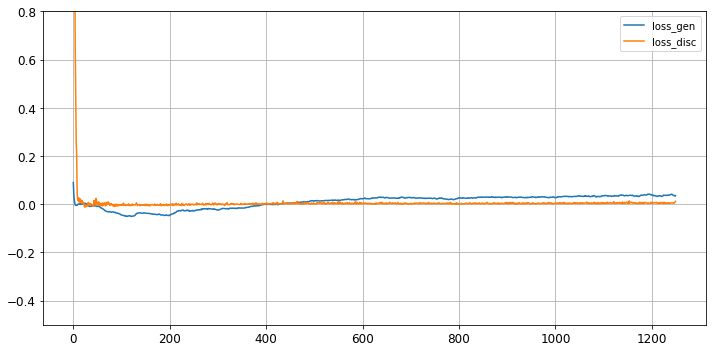

Predicted Values: (1000, 2)
save latent space


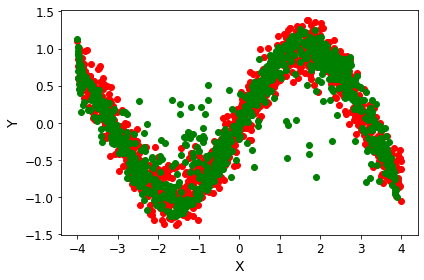

save countour line


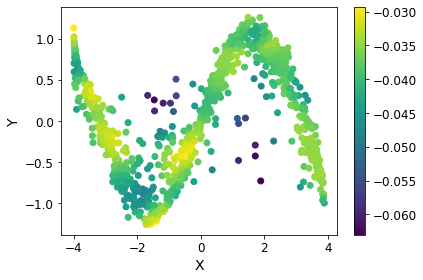

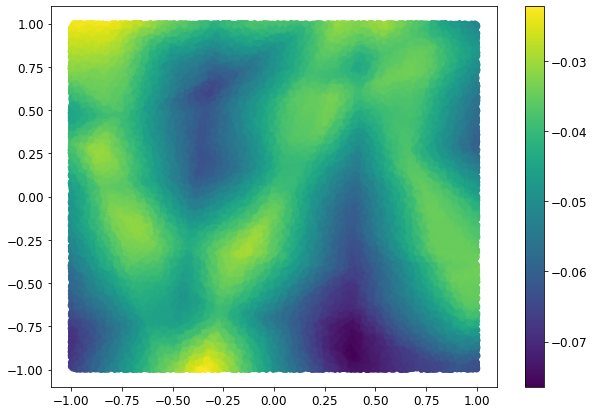

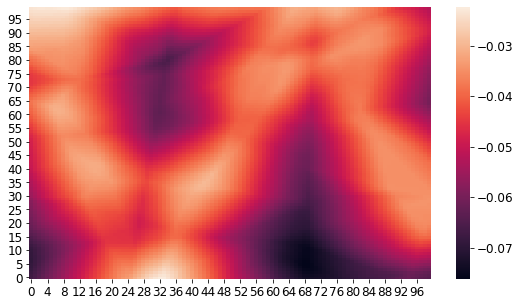

Epoch 1251/10000
critic: 0.005648 - generator: 0.036933 - 0s
Epoch 1252/10000
critic: 0.004736 - generator: 0.037795 - 0s
Epoch 1253/10000
critic: 0.005203 - generator: 0.036962 - 0s
Epoch 1254/10000
critic: 0.003748 - generator: 0.036218 - 0s
Epoch 1255/10000
critic: 0.005488 - generator: 0.037300 - 0s
Epoch 1256/10000
critic: 0.003602 - generator: 0.035958 - 0s
Epoch 1257/10000
critic: 0.003571 - generator: 0.035721 - 0s
Epoch 1258/10000
critic: 0.005921 - generator: 0.034473 - 0s
Epoch 1259/10000
critic: 0.004185 - generator: 0.034231 - 0s
Epoch 1260/10000
critic: 0.002924 - generator: 0.035502 - 0s
Epoch 1261/10000
critic: 0.005093 - generator: 0.034971 - 0s
Epoch 1262/10000
critic: 0.007997 - generator: 0.036107 - 0s
Epoch 1263/10000
critic: 0.007496 - generator: 0.034300 - 0s
Epoch 1264/10000
critic: 0.005919 - generator: 0.034189 - 0s
Epoch 1265/10000
critic: 0.005735 - generator: 0.035144 - 0s
Epoch 1266/10000
critic: 0.006160 - generator: 0.033747 - 0s
Epoch 1267/10000
critic:

critic: 0.002529 - generator: 0.037768 - 0s
Epoch 1388/10000
critic: 0.008325 - generator: 0.038341 - 0s
Epoch 1389/10000
critic: 0.007663 - generator: 0.037526 - 0s
Epoch 1390/10000
critic: 0.008300 - generator: 0.039553 - 0s
Epoch 1391/10000
critic: 0.009580 - generator: 0.039672 - 0s
Epoch 1392/10000
critic: 0.003491 - generator: 0.037187 - 0s
Epoch 1393/10000
critic: 0.006450 - generator: 0.038799 - 0s
Epoch 1394/10000
critic: 0.006728 - generator: 0.037769 - 0s
Epoch 1395/10000
critic: 0.007136 - generator: 0.041145 - 0s
Epoch 1396/10000
critic: 0.006872 - generator: 0.040575 - 0s
Epoch 1397/10000
critic: 0.009953 - generator: 0.040274 - 0s
Epoch 1398/10000
critic: 0.007700 - generator: 0.039197 - 0s
Epoch 1399/10000
critic: 0.005449 - generator: 0.040059 - 0s
Epoch 1400/10000
critic: 0.008018 - generator: 0.039857 - 0s
Epoch 1401/10000
critic: 0.007357 - generator: 0.040007 - 0s
Epoch 1402/10000
critic: 0.005087 - generator: 0.041437 - 0s
Epoch 1403/10000
critic: 0.007936 - gener

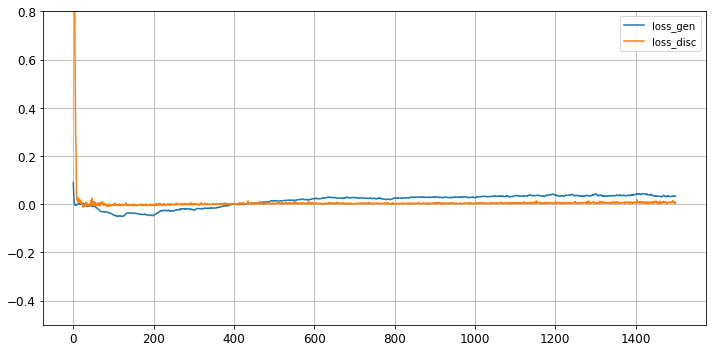

Predicted Values: (1000, 2)
save latent space


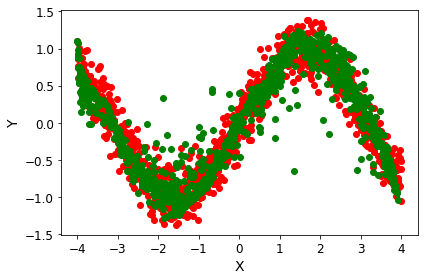

save countour line


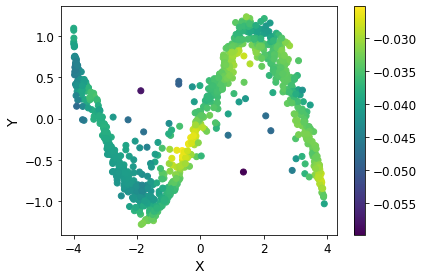

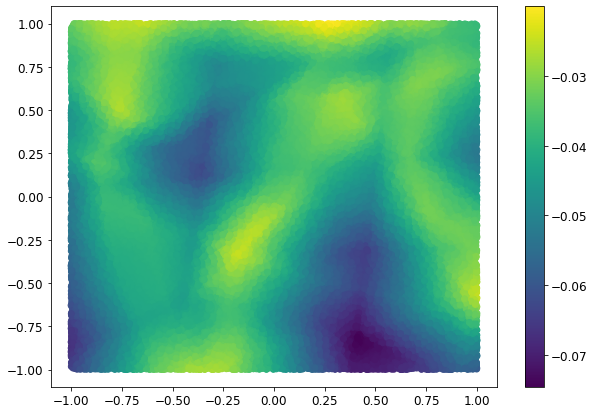

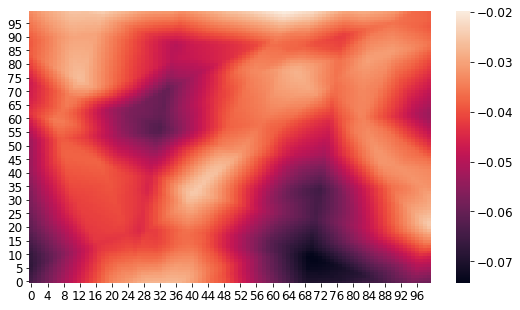

Epoch 1501/10000
critic: 0.007944 - generator: 0.031938 - 0s
Epoch 1502/10000
critic: 0.006561 - generator: 0.033228 - 0s
Epoch 1503/10000
critic: 0.008511 - generator: 0.032756 - 0s
Epoch 1504/10000
critic: 0.007502 - generator: 0.032285 - 0s
Epoch 1505/10000
critic: 0.010978 - generator: 0.032187 - 0s
Epoch 1506/10000
critic: 0.012815 - generator: 0.029857 - 0s
Epoch 1507/10000
critic: 0.009078 - generator: 0.029692 - 0s
Epoch 1508/10000
critic: 0.010893 - generator: 0.030163 - 0s
Epoch 1509/10000
critic: 0.008179 - generator: 0.029181 - 0s
Epoch 1510/10000
critic: 0.005994 - generator: 0.029882 - 0s
Epoch 1511/10000
critic: 0.009805 - generator: 0.028279 - 0s
Epoch 1512/10000
critic: 0.007282 - generator: 0.028546 - 0s
Epoch 1513/10000
critic: 0.006442 - generator: 0.028267 - 0s
Epoch 1514/10000
critic: 0.005914 - generator: 0.029687 - 0s
Epoch 1515/10000
critic: 0.005924 - generator: 0.030548 - 0s
Epoch 1516/10000
critic: 0.006594 - generator: 0.029397 - 0s
Epoch 1517/10000
critic:

critic: 0.007528 - generator: 0.022012 - 0s
Epoch 1637/10000
critic: 0.008877 - generator: 0.023411 - 0s
Epoch 1638/10000
critic: 0.004721 - generator: 0.022938 - 0s
Epoch 1639/10000
critic: 0.011262 - generator: 0.023899 - 0s
Epoch 1640/10000
critic: 0.008877 - generator: 0.022370 - 0s
Epoch 1641/10000
critic: 0.012289 - generator: 0.022658 - 0s
Epoch 1642/10000
critic: 0.008907 - generator: 0.024117 - 0s
Epoch 1643/10000
critic: 0.007880 - generator: 0.027544 - 0s
Epoch 1644/10000
critic: 0.013898 - generator: 0.025543 - 0s
Epoch 1645/10000
critic: 0.007421 - generator: 0.024957 - 0s
Epoch 1646/10000
critic: 0.006928 - generator: 0.022306 - 0s
Epoch 1647/10000
critic: 0.002923 - generator: 0.023492 - 0s
Epoch 1648/10000
critic: 0.006892 - generator: 0.023072 - 0s
Epoch 1649/10000
critic: 0.008822 - generator: 0.022786 - 0s
Epoch 1650/10000
critic: 0.008847 - generator: 0.025921 - 0s
Epoch 1651/10000
critic: 0.009467 - generator: 0.025565 - 0s
Epoch 1652/10000
critic: 0.005261 - gener

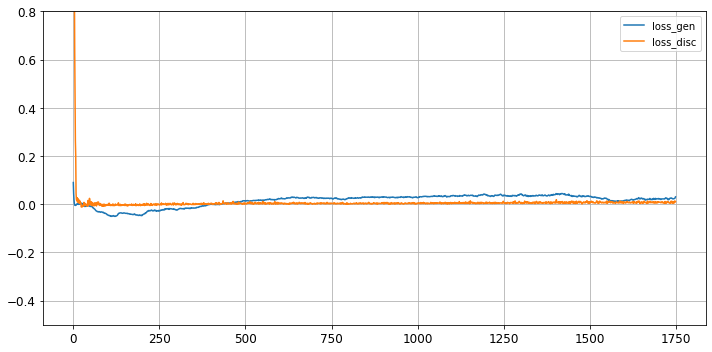

Predicted Values: (1000, 2)
save latent space


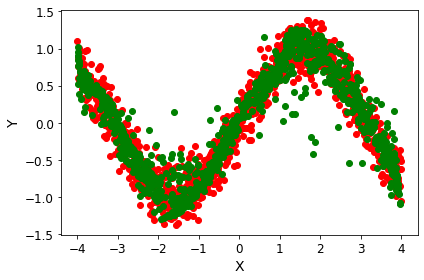

save countour line


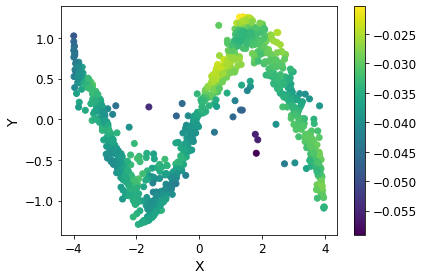

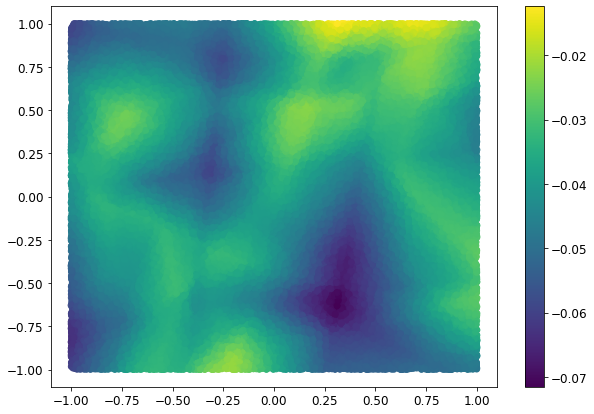

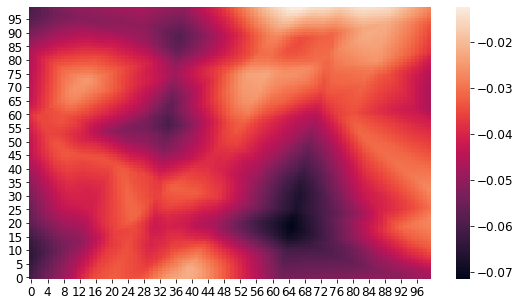

Epoch 1751/10000
critic: 0.007492 - generator: 0.031370 - 0s
Epoch 1752/10000
critic: 0.005472 - generator: 0.029771 - 0s
Epoch 1753/10000
critic: 0.006489 - generator: 0.027799 - 0s
Epoch 1754/10000
critic: 0.007464 - generator: 0.027723 - 0s
Epoch 1755/10000
critic: 0.005767 - generator: 0.027412 - 0s
Epoch 1756/10000
critic: 0.004245 - generator: 0.027888 - 0s
Epoch 1757/10000
critic: 0.013029 - generator: 0.029194 - 0s
Epoch 1758/10000
critic: 0.011325 - generator: 0.028826 - 0s
Epoch 1759/10000
critic: 0.005451 - generator: 0.030063 - 0s
Epoch 1760/10000
critic: 0.008507 - generator: 0.029654 - 0s
Epoch 1761/10000
critic: 0.007065 - generator: 0.030503 - 0s
Epoch 1762/10000
critic: 0.003910 - generator: 0.029378 - 0s
Epoch 1763/10000
critic: 0.012789 - generator: 0.031370 - 0s
Epoch 1764/10000
critic: 0.003753 - generator: 0.030442 - 0s
Epoch 1765/10000
critic: 0.009642 - generator: 0.029499 - 0s
Epoch 1766/10000
critic: 0.007539 - generator: 0.029143 - 0s
Epoch 1767/10000
critic:

critic: 0.003642 - generator: 0.038778 - 0s
Epoch 1887/10000
critic: 0.007849 - generator: 0.038799 - 0s
Epoch 1888/10000
critic: 0.010021 - generator: 0.037277 - 0s
Epoch 1889/10000
critic: 0.008970 - generator: 0.035898 - 0s
Epoch 1890/10000
critic: 0.004395 - generator: 0.035758 - 0s
Epoch 1891/10000
critic: 0.004677 - generator: 0.034989 - 0s
Epoch 1892/10000
critic: 0.006337 - generator: 0.036441 - 0s
Epoch 1893/10000
critic: 0.008289 - generator: 0.033547 - 0s
Epoch 1894/10000
critic: 0.005609 - generator: 0.031782 - 0s
Epoch 1895/10000
critic: 0.011331 - generator: 0.032182 - 0s
Epoch 1896/10000
critic: 0.012686 - generator: 0.031682 - 0s
Epoch 1897/10000
critic: 0.005007 - generator: 0.033037 - 0s
Epoch 1898/10000
critic: 0.005428 - generator: 0.032879 - 0s
Epoch 1899/10000
critic: 0.007691 - generator: 0.031001 - 0s
Epoch 1900/10000
critic: 0.005784 - generator: 0.031940 - 0s
Epoch 1901/10000
critic: 0.005087 - generator: 0.032324 - 0s
Epoch 1902/10000
critic: 0.005312 - gener

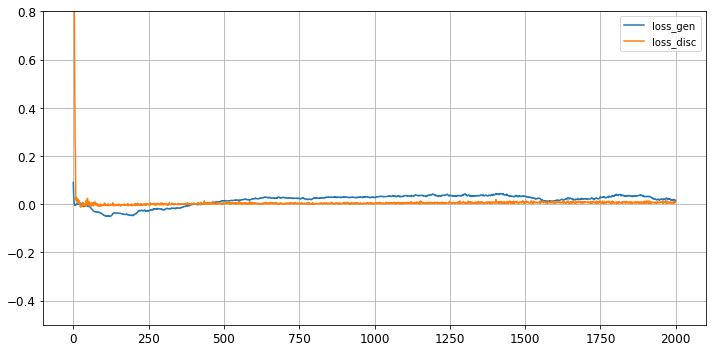

Predicted Values: (1000, 2)
save latent space


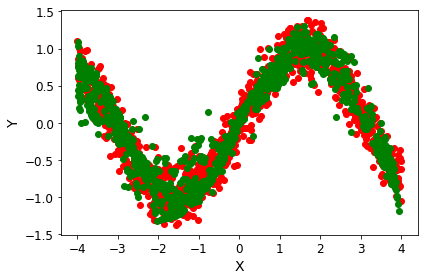

save countour line


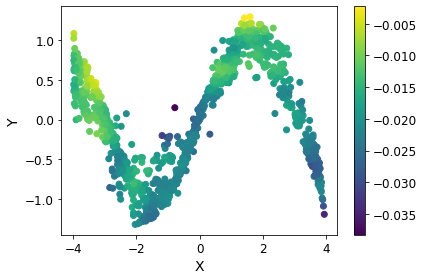

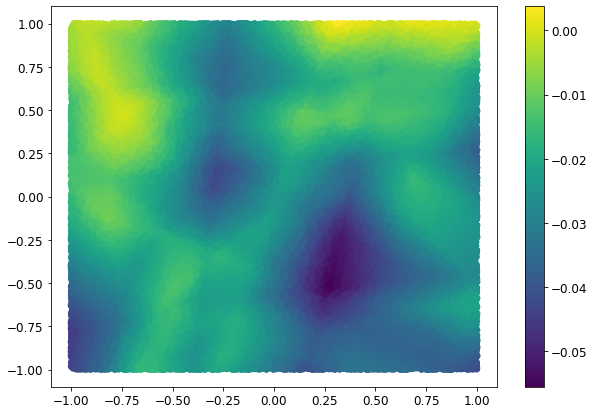

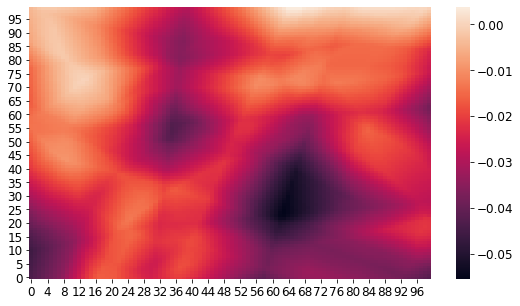

Epoch 2001/10000
critic: 0.005685 - generator: 0.016336 - 0s
Epoch 2002/10000
critic: 0.008739 - generator: 0.015501 - 0s
Epoch 2003/10000
critic: 0.008247 - generator: 0.017313 - 0s
Epoch 2004/10000
critic: 0.006980 - generator: 0.019320 - 0s
Epoch 2005/10000
critic: 0.005621 - generator: 0.017470 - 0s
Epoch 2006/10000
critic: 0.003794 - generator: 0.017287 - 0s
Epoch 2007/10000
critic: 0.003167 - generator: 0.018034 - 0s
Epoch 2008/10000
critic: 0.008707 - generator: 0.017029 - 0s
Epoch 2009/10000
critic: 0.005370 - generator: 0.016181 - 0s
Epoch 2010/10000
critic: 0.004481 - generator: 0.016192 - 0s
Epoch 2011/10000
critic: 0.008737 - generator: 0.017708 - 0s
Epoch 2012/10000
critic: 0.008476 - generator: 0.018580 - 0s
Epoch 2013/10000
critic: 0.005163 - generator: 0.018712 - 0s
Epoch 2014/10000
critic: 0.007348 - generator: 0.017358 - 0s
Epoch 2015/10000
critic: 0.011660 - generator: 0.017991 - 0s
Epoch 2016/10000
critic: 0.008112 - generator: 0.017554 - 0s
Epoch 2017/10000
critic:

critic: 0.005046 - generator: 0.006870 - 0s
Epoch 2138/10000
critic: 0.004057 - generator: 0.007801 - 0s
Epoch 2139/10000
critic: 0.005189 - generator: 0.007383 - 0s
Epoch 2140/10000
critic: 0.004111 - generator: 0.008516 - 0s
Epoch 2141/10000
critic: 0.003469 - generator: 0.007590 - 0s
Epoch 2142/10000
critic: 0.006005 - generator: 0.005843 - 0s
Epoch 2143/10000
critic: 0.009808 - generator: 0.004444 - 0s
Epoch 2144/10000
critic: 0.009156 - generator: 0.005261 - 0s
Epoch 2145/10000
critic: 0.009247 - generator: 0.006753 - 0s
Epoch 2146/10000
critic: 0.009927 - generator: 0.005411 - 0s
Epoch 2147/10000
critic: 0.004168 - generator: 0.004498 - 0s
Epoch 2148/10000
critic: 0.007998 - generator: 0.002311 - 0s
Epoch 2149/10000
critic: 0.011020 - generator: 0.002953 - 0s
Epoch 2150/10000
critic: 0.006892 - generator: 0.003182 - 0s
Epoch 2151/10000
critic: 0.009240 - generator: 0.004914 - 0s
Epoch 2152/10000
critic: 0.006354 - generator: 0.005260 - 0s
Epoch 2153/10000
critic: 0.007811 - gener

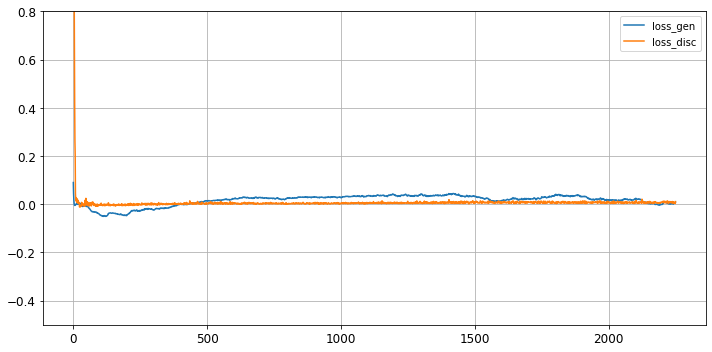

Predicted Values: (1000, 2)
save latent space


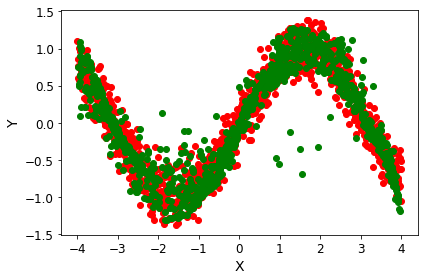

save countour line


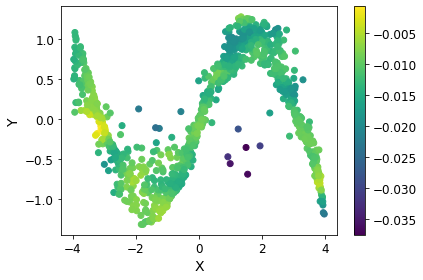

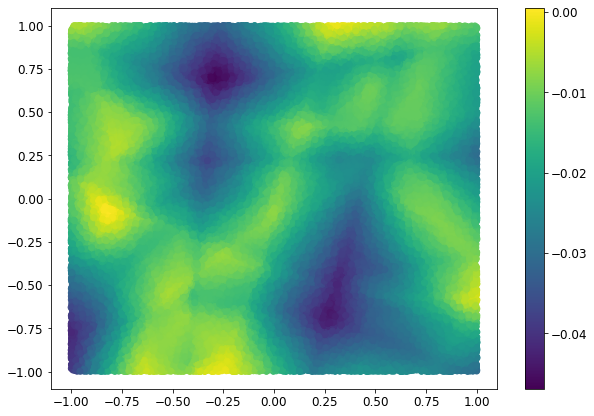

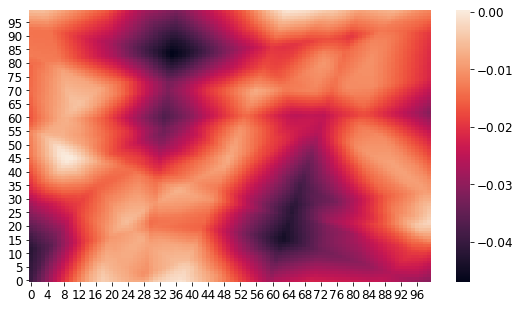

Epoch 2251/10000
critic: 0.006847 - generator: 0.008279 - 0s
Epoch 2252/10000
critic: 0.006244 - generator: 0.007061 - 0s
Epoch 2253/10000
critic: 0.015160 - generator: 0.006892 - 0s
Epoch 2254/10000
critic: 0.006978 - generator: 0.005953 - 0s
Epoch 2255/10000
critic: 0.002375 - generator: 0.003897 - 0s
Epoch 2256/10000
critic: 0.005808 - generator: 0.005172 - 0s
Epoch 2257/10000
critic: 0.012271 - generator: 0.006216 - 0s
Epoch 2258/10000
critic: 0.005815 - generator: 0.006781 - 0s
Epoch 2259/10000
critic: 0.005978 - generator: 0.006810 - 0s
Epoch 2260/10000
critic: 0.005186 - generator: 0.006878 - 0s
Epoch 2261/10000
critic: 0.010925 - generator: 0.007227 - 0s
Epoch 2262/10000
critic: 0.005901 - generator: 0.007922 - 0s
Epoch 2263/10000
critic: 0.003780 - generator: 0.005576 - 0s
Epoch 2264/10000
critic: 0.006499 - generator: 0.004379 - 0s
Epoch 2265/10000
critic: 0.012245 - generator: 0.005266 - 0s
Epoch 2266/10000
critic: 0.007807 - generator: 0.005633 - 0s
Epoch 2267/10000
critic:

critic: 0.008772 - generator: 0.015093 - 0s
Epoch 2388/10000
critic: 0.010991 - generator: 0.016264 - 0s
Epoch 2389/10000
critic: 0.005858 - generator: 0.012869 - 0s
Epoch 2390/10000
critic: 0.004942 - generator: 0.014231 - 0s
Epoch 2391/10000
critic: 0.011221 - generator: 0.015133 - 0s
Epoch 2392/10000
critic: 0.007055 - generator: 0.015158 - 0s
Epoch 2393/10000
critic: 0.008100 - generator: 0.014097 - 0s
Epoch 2394/10000
critic: 0.006675 - generator: 0.014868 - 0s
Epoch 2395/10000
critic: 0.006221 - generator: 0.015639 - 0s
Epoch 2396/10000
critic: 0.011715 - generator: 0.013011 - 0s
Epoch 2397/10000
critic: 0.003976 - generator: 0.012860 - 0s
Epoch 2398/10000
critic: 0.002968 - generator: 0.012677 - 0s
Epoch 2399/10000
critic: 0.007608 - generator: 0.012632 - 0s
Epoch 2400/10000
critic: 0.007669 - generator: 0.013152 - 0s
Epoch 2401/10000
critic: 0.012414 - generator: 0.013019 - 0s
Epoch 2402/10000
critic: 0.007040 - generator: 0.012790 - 0s
Epoch 2403/10000
critic: 0.010800 - gener

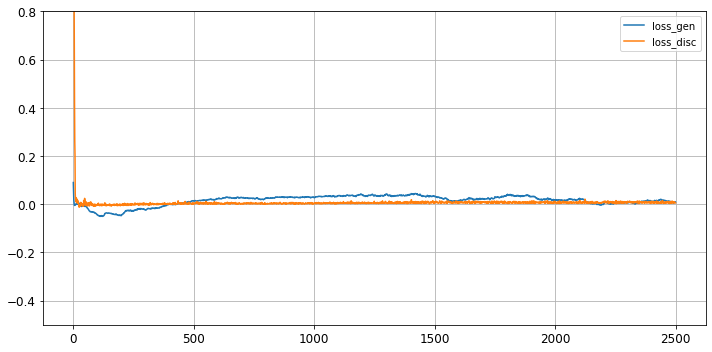

Predicted Values: (1000, 2)
save latent space


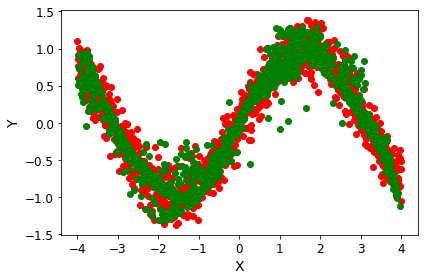

save countour line


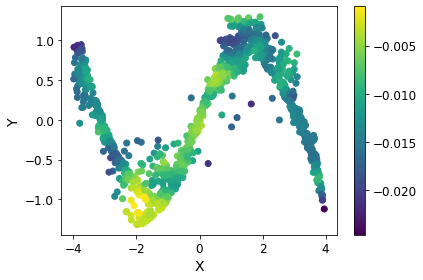

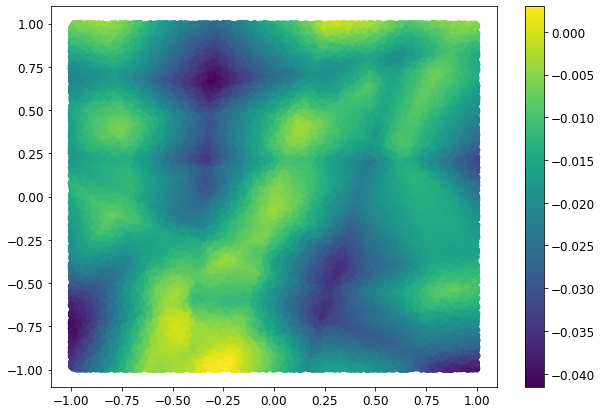

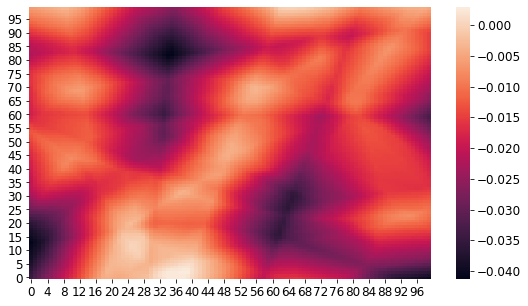

Epoch 2501/10000
critic: 0.008060 - generator: 0.008171 - 0s
Epoch 2502/10000
critic: 0.007199 - generator: 0.008219 - 0s
Epoch 2503/10000
critic: 0.006516 - generator: 0.008833 - 0s
Epoch 2504/10000
critic: 0.015619 - generator: 0.009324 - 0s
Epoch 2505/10000
critic: 0.006498 - generator: 0.008787 - 0s
Epoch 2506/10000
critic: 0.002976 - generator: 0.010099 - 0s
Epoch 2507/10000
critic: 0.011709 - generator: 0.009848 - 0s
Epoch 2508/10000
critic: 0.010872 - generator: 0.008752 - 0s
Epoch 2509/10000
critic: 0.005824 - generator: 0.010459 - 0s
Epoch 2510/10000
critic: 0.006731 - generator: 0.009184 - 0s
Epoch 2511/10000
critic: 0.009986 - generator: 0.009000 - 0s
Epoch 2512/10000
critic: 0.005467 - generator: 0.007826 - 0s
Epoch 2513/10000
critic: 0.007954 - generator: 0.008411 - 0s
Epoch 2514/10000
critic: 0.007376 - generator: 0.008629 - 0s
Epoch 2515/10000
critic: 0.006561 - generator: 0.007271 - 0s
Epoch 2516/10000
critic: 0.006986 - generator: 0.007384 - 0s
Epoch 2517/10000
critic:

critic: 0.006757 - generator: -0.006497 - 0s
Epoch 2636/10000
critic: 0.012168 - generator: -0.007568 - 0s
Epoch 2637/10000
critic: 0.013619 - generator: -0.006273 - 0s
Epoch 2638/10000
critic: 0.007790 - generator: -0.008084 - 0s
Epoch 2639/10000
critic: 0.004425 - generator: -0.007965 - 0s
Epoch 2640/10000
critic: 0.011608 - generator: -0.007812 - 0s
Epoch 2641/10000
critic: 0.009461 - generator: -0.008434 - 0s
Epoch 2642/10000
critic: 0.007429 - generator: -0.006915 - 0s
Epoch 2643/10000
critic: 0.006284 - generator: -0.007252 - 0s
Epoch 2644/10000
critic: 0.008625 - generator: -0.007564 - 0s
Epoch 2645/10000
critic: 0.009435 - generator: -0.009012 - 0s
Epoch 2646/10000
critic: 0.011158 - generator: -0.011349 - 0s
Epoch 2647/10000
critic: 0.009362 - generator: -0.010625 - 0s
Epoch 2648/10000
critic: 0.006443 - generator: -0.011826 - 0s
Epoch 2649/10000
critic: 0.009065 - generator: -0.013782 - 0s
Epoch 2650/10000
critic: 0.006193 - generator: -0.014027 - 0s
Epoch 2651/10000
critic: 

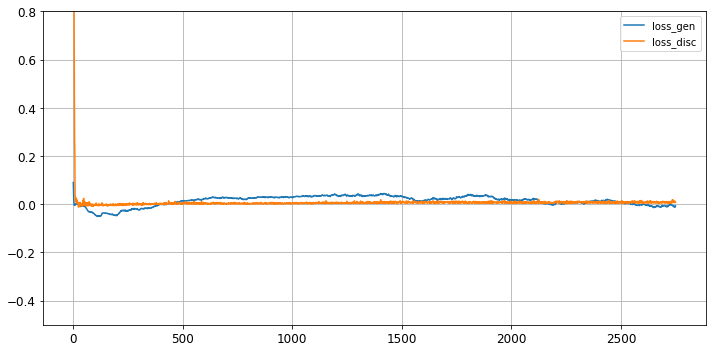

Predicted Values: (1000, 2)
save latent space


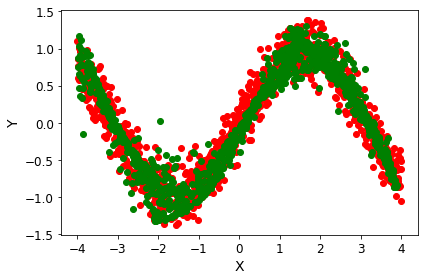

save countour line


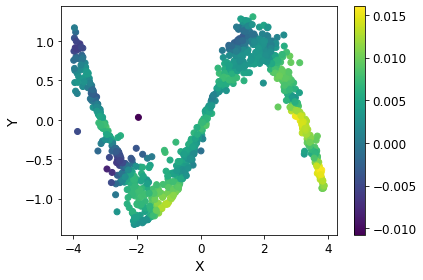

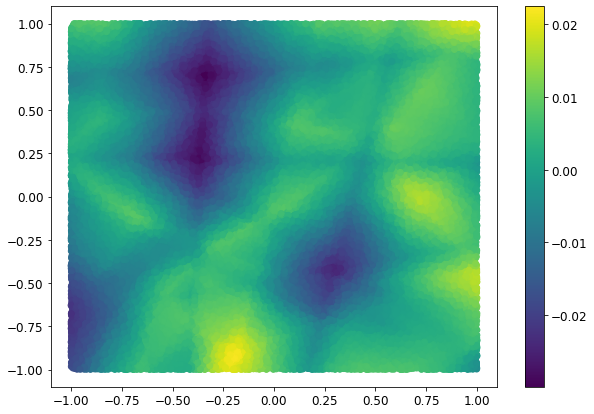

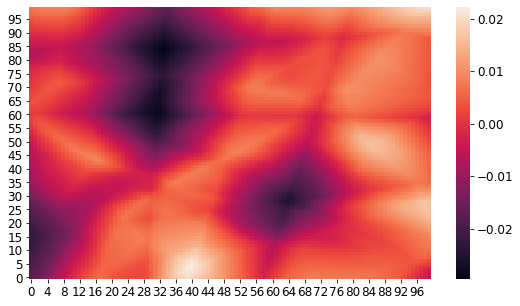

Epoch 2751/10000
critic: 0.006089 - generator: -0.007609 - 0s
Epoch 2752/10000
critic: 0.010160 - generator: -0.009642 - 0s
Epoch 2753/10000
critic: 0.013769 - generator: -0.009399 - 0s
Epoch 2754/10000
critic: 0.011617 - generator: -0.006976 - 0s
Epoch 2755/10000
critic: 0.007377 - generator: -0.004850 - 0s
Epoch 2756/10000
critic: 0.004057 - generator: -0.004457 - 0s
Epoch 2757/10000
critic: 0.005400 - generator: -0.003386 - 0s
Epoch 2758/10000
critic: 0.010157 - generator: -0.002288 - 0s
Epoch 2759/10000
critic: 0.010494 - generator: -0.001674 - 0s
Epoch 2760/10000
critic: 0.003319 - generator: -0.003998 - 0s
Epoch 2761/10000
critic: 0.015259 - generator: -0.004655 - 0s
Epoch 2762/10000
critic: 0.004127 - generator: -0.002638 - 0s
Epoch 2763/10000
critic: 0.011191 - generator: -0.003878 - 0s
Epoch 2764/10000
critic: 0.007158 - generator: -0.005171 - 0s
Epoch 2765/10000
critic: 0.009034 - generator: -0.005894 - 0s
Epoch 2766/10000
critic: 0.013468 - generator: -0.005090 - 0s
Epoch 27

critic: 0.010305 - generator: 0.000692 - 0s
Epoch 2885/10000
critic: 0.012092 - generator: -0.000570 - 0s
Epoch 2886/10000
critic: 0.005349 - generator: -0.000312 - 0s
Epoch 2887/10000
critic: 0.007713 - generator: 0.000128 - 0s
Epoch 2888/10000
critic: 0.010956 - generator: 0.001841 - 0s
Epoch 2889/10000
critic: 0.008663 - generator: 0.002581 - 0s
Epoch 2890/10000
critic: 0.007746 - generator: 0.004026 - 0s
Epoch 2891/10000
critic: 0.007199 - generator: 0.005600 - 0s
Epoch 2892/10000
critic: 0.008707 - generator: 0.006639 - 0s
Epoch 2893/10000
critic: 0.007575 - generator: 0.007636 - 0s
Epoch 2894/10000
critic: 0.008530 - generator: 0.007473 - 0s
Epoch 2895/10000
critic: 0.009215 - generator: 0.007044 - 0s
Epoch 2896/10000
critic: 0.008469 - generator: 0.008099 - 0s
Epoch 2897/10000
critic: 0.006128 - generator: 0.008957 - 0s
Epoch 2898/10000
critic: 0.007155 - generator: 0.010801 - 0s
Epoch 2899/10000
critic: 0.007360 - generator: 0.012176 - 0s
Epoch 2900/10000
critic: 0.009585 - gen

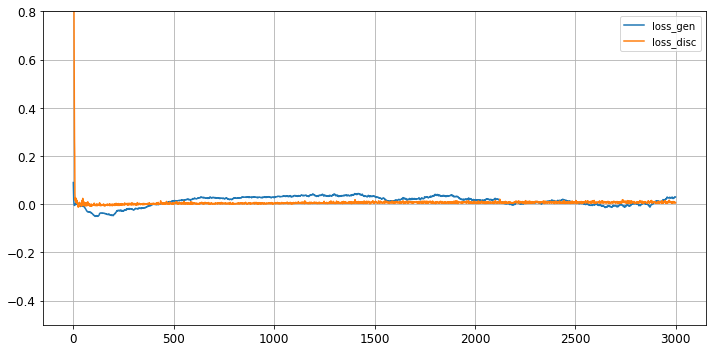

Predicted Values: (1000, 2)
save latent space


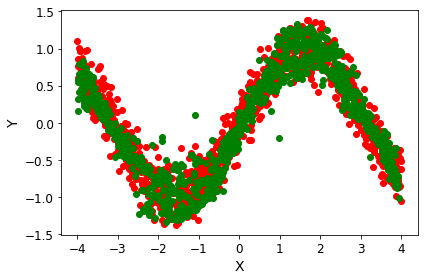

save countour line


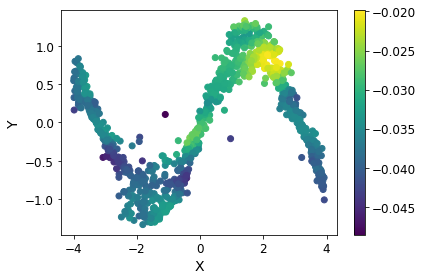

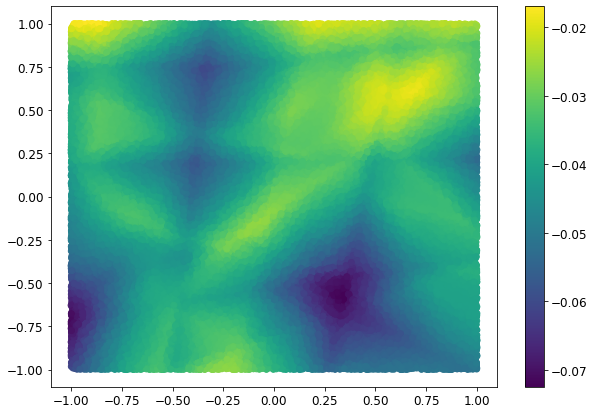

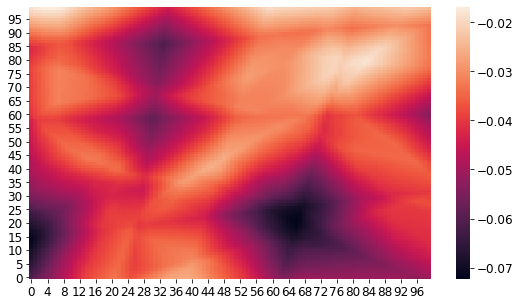

Epoch 3001/10000
critic: 0.007171 - generator: 0.028183 - 0s
Epoch 3002/10000
critic: 0.007037 - generator: 0.028115 - 0s
Epoch 3003/10000
critic: 0.009587 - generator: 0.027592 - 0s
Epoch 3004/10000
critic: 0.010117 - generator: 0.028064 - 0s
Epoch 3005/10000
critic: 0.009373 - generator: 0.029443 - 0s
Epoch 3006/10000
critic: 0.009307 - generator: 0.028443 - 0s
Epoch 3007/10000
critic: 0.008375 - generator: 0.031350 - 0s
Epoch 3008/10000
critic: 0.007513 - generator: 0.031829 - 0s
Epoch 3009/10000
critic: 0.007250 - generator: 0.034287 - 0s
Epoch 3010/10000
critic: 0.007781 - generator: 0.033491 - 0s
Epoch 3011/10000
critic: 0.004375 - generator: 0.032231 - 0s
Epoch 3012/10000
critic: 0.009275 - generator: 0.031559 - 0s
Epoch 3013/10000
critic: 0.004444 - generator: 0.033427 - 0s
Epoch 3014/10000
critic: 0.009901 - generator: 0.033902 - 0s
Epoch 3015/10000
critic: 0.006206 - generator: 0.032136 - 0s
Epoch 3016/10000
critic: 0.009727 - generator: 0.033459 - 0s
Epoch 3017/10000
critic:

critic: 0.006955 - generator: 0.049085 - 0s
Epoch 3137/10000
critic: 0.003900 - generator: 0.051376 - 0s
Epoch 3138/10000
critic: 0.013067 - generator: 0.052270 - 0s
Epoch 3139/10000
critic: 0.007531 - generator: 0.051570 - 0s
Epoch 3140/10000
critic: 0.007442 - generator: 0.054113 - 0s
Epoch 3141/10000
critic: 0.008405 - generator: 0.055285 - 0s
Epoch 3142/10000
critic: 0.007272 - generator: 0.053483 - 0s
Epoch 3143/10000
critic: 0.008337 - generator: 0.053127 - 0s
Epoch 3144/10000
critic: 0.009754 - generator: 0.054812 - 0s
Epoch 3145/10000
critic: 0.012542 - generator: 0.054261 - 0s
Epoch 3146/10000
critic: 0.013431 - generator: 0.053262 - 0s
Epoch 3147/10000
critic: 0.009842 - generator: 0.053272 - 0s
Epoch 3148/10000
critic: 0.004985 - generator: 0.051552 - 0s
Epoch 3149/10000
critic: 0.006235 - generator: 0.050685 - 0s
Epoch 3150/10000
critic: 0.011585 - generator: 0.051398 - 0s
Epoch 3151/10000
critic: 0.009543 - generator: 0.052842 - 0s
Epoch 3152/10000
critic: 0.019890 - gener

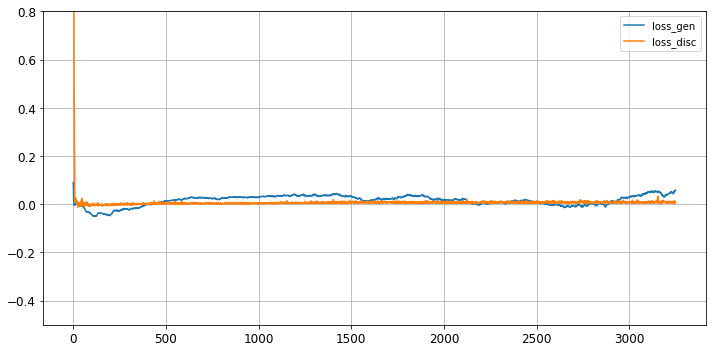

Predicted Values: (1000, 2)
save latent space


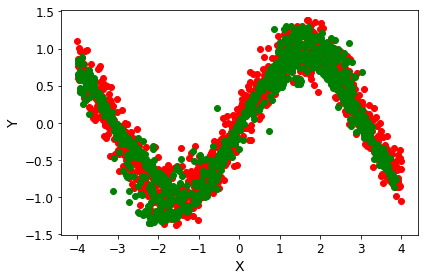

save countour line


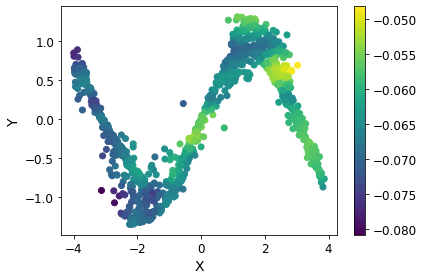

KeyboardInterrupt: 

In [10]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [ ]:
k=k
epoch = 500

In [ ]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

In [ ]:
generator = keras.models.load_model('GANS/Models/generator_v'+str(k)+'_epochs_'+str(epoch))

In [ ]:
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)

In [ ]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[18,7])
plt.imshow(countour_line)

In [ ]:
countour_mesh = Image.open('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(countour_mesh)

In [ ]:
heatmap = Image.open('GANS/Result/'+'heatmap_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(heatmap)


### Applying the prediction function

## Fixed Input

In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

print("predict1",predict1.shape)
predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
print("predictthis",predictthis.shape)

predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = wgan.predict(input_test, scaler) #wagn.predict

In [ ]:
print("Generated Data:",X_generated.shape)

plt.scatter(X_train, y_train,label="Sample Data")
plt.scatter(X_generated[:,0],X_generated[:,1])
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()